# Make a quick fit using astropy.modeling

## Authors
Rocio Kiman

## Learning Goals
* Know basic models in Astropy Modeling
* Be able to make a quick fit of your data
* Visualize the fit

## Keywords
Modeling, Fit 

## Summary
In this tutorial, we will become familiar with the models available in `astropy.modeling` and learn how to make a quick fit of our data.

### List of available functions 

* `Gaussian1D`
* `Trapezoid1D`
* `Polynomial1D`
* `Sine1D`
* ...

### List of available fitters

* `LinearLSQFitter()`
* `SLSQPLSQFitter()`
* `LevMarLSQFitter()`
* ...

Check http://docs.astropy.org/en/stable/modeling/ for more information

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
# Make plots display in notebooks
%matplotlib inline 

## 1) First fit

Note: For this template I'm going to use fake data, but for the real tutorial I'm going to use real data.

In [2]:
x1 = np.linspace(0, 4, 1000)  # Makes an array from 0 to 4 of 1000 elements
y1 = x1**3 - 6*x1**2 + 12*x1 - 9 
# Now we add some noise to the data
y1 = np.array([y_point + np.random.normal(0,2) for y_point in y1])  # This is called list comprehension:
                                                                    # http://www.pythonforbeginners.com/basics/list-comprehensions-in-python

Let's plot it to see how it looks like:

Text(0,0.5,'$y_1$')

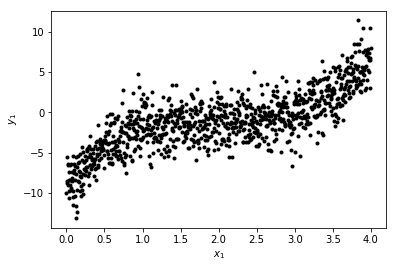

In [3]:
plt.plot(x1, y1, 'k.')
plt.xlabel('$x_1$')  # Use $$ to write in latex format
plt.ylabel('$y_1$')

This looks like a polynomial (even if we couldn't see how we created the fake data). But we want to know which degree the polynomial is. For this we can use astropy.modeling. The process consist of two parts: 
* Set up the model
* Set up the fitter
* Fit the data

We will see what this means. 

#### Let's start with the first step: Set up the model

In [4]:
model_1 = models.Polynomial1D(degree=2)

#### Second step: Set up the fitter

In [5]:
fitter = fitting.LinearLSQFitter() 

#### Third step: Fit the data

In [6]:
best_fit1 = fitter(model_1, x1, y1)

Same but with another type of polynomial

In [7]:
model_2 = models.Polynomial1D(degree=3)
fitter = fitting.LinearLSQFitter()
best_fit2 = fitter(model_2, x1, y1)

#### Compare results

In [8]:
best_fit1

<Polynomial1D(2, c0=-5.86069523, c1=2.30370801, c2=0.03217649)>

In [9]:
best_fit2

<Polynomial1D(3, c0=-9.09458075, c1=12.02969983, c2=-6.0496103, c3=1.01363113)>

Text(0,0.5,'$y$')

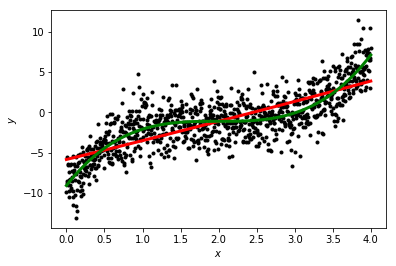

In [10]:
plt.plot(x1, y1, 'k.')
plt.plot(x1, best_fit1(x1), color='r', linewidth=3)  # We changed the width of the line to make it more visible
plt.plot(x1, best_fit2(x1), color='g', linewidth=3)
plt.xlabel('$x$')
plt.ylabel('$y$')

## 2) Second Fit

### Let's understand what the fitter means

New data: Gaussian distribution

In [11]:
mu, sigma, amplitude = 0.0, 10.0, 10.0
x2 = np.linspace(-30, 30, 1000)
y2 = amplitude * np.exp(-(x2-mu)**2 / (2*sigma**2))
y2 = np.array([y_point + np.random.normal(0, 1) for y_point in y2])

Text(0,0.5,'$y_2$')

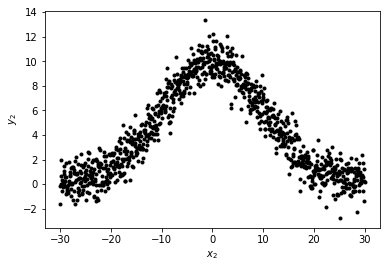

In [12]:
plt.plot(x2, y2, 'k.')
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

Exercise: Fit this data using the Gaussian1D model and the same fitter we used for the previous fit.
* What happend? Why? No problem if you don't know why, you will understand with the next two questions
* Try changing the fitter to: `fitter = fitting.SLSQPLSQFitter()`
* What is the difference?

## 3) Third Fit

Exercise: For the next data: 
* Choose model and fitter to fit this data.
* Compare different options.

In [13]:
x3 = np.linspace(0, 3, 1000)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])

Text(0,0.5,'$y_3$')

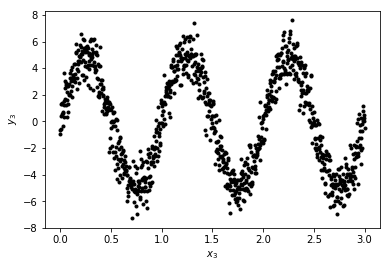

In [14]:
plt.plot(x3, y3, 'k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')